In [1]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
names = ['sell', 'buy', 'last', 'vol', 'high', 'low', 'date']

data = pd.read_csv('btc.csv', names=names, skiprows=1)

In [3]:
data.head()

,sell,buy,last,vol,high,low,date
0,23000.0,22900.0,23000.0,788.669923,23990.0,20600.0,1509541173
1,23000.0,22900.0,23000.0,788.467873,23990.0,20600.0,1509541173
2,23000.0,22900.0,23000.0,788.467873,23990.0,20600.0,1509541173
3,23000.0,22900.0,23000.0,788.679923,23990.0,20600.0,1509541173
4,23000.0,22900.0,23000.0,788.482139,23990.0,20600.0,1509541189


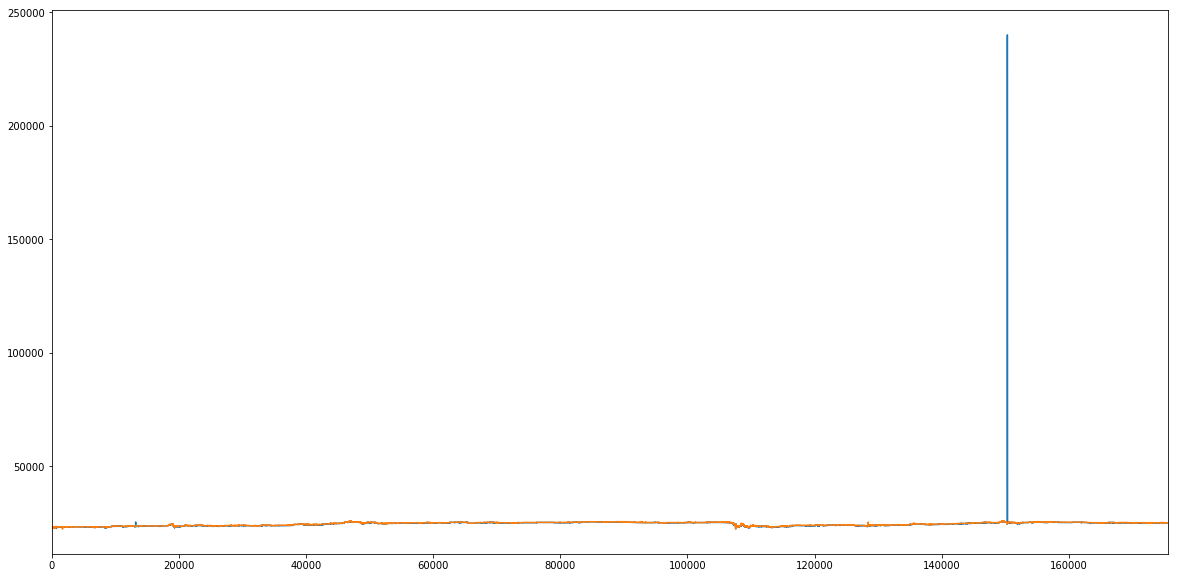

In [4]:
data['buy'].plot()
data['sell'].plot()

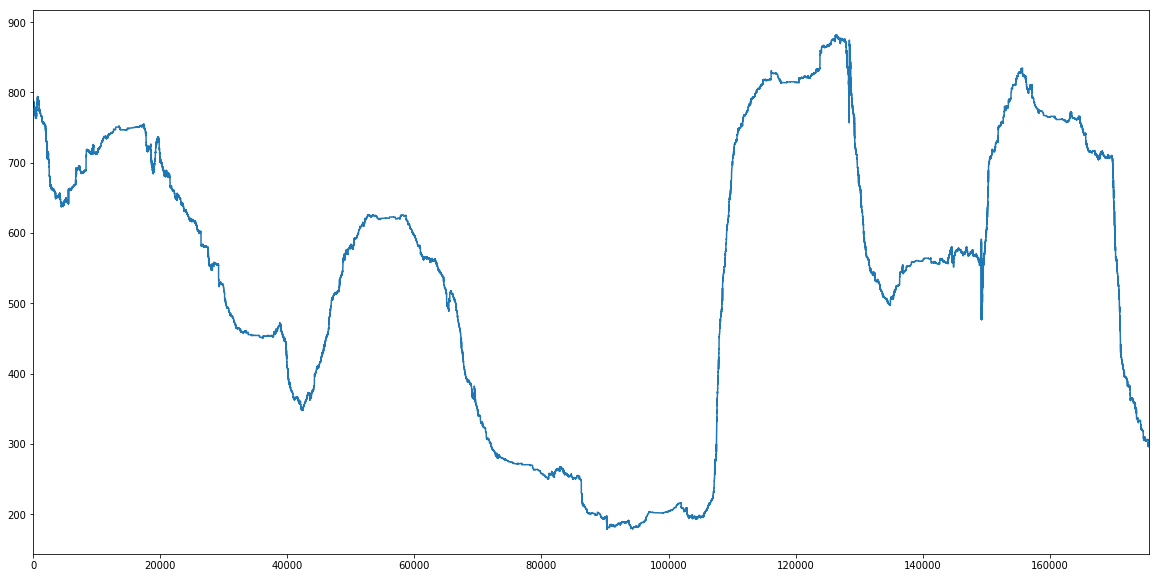

In [5]:
data['vol'].plot()

In [6]:
data.describe()

,sell,buy,last,vol,high,low,date
count,175620.000000,175620.000000,175620.000000,175620.000000,175620.000000,175620.000000,1.756200e+05
mean,24729.263537,24630.898887,24680.720030,543.186669,25368.390919,23632.520139,1.509907e+09
std,719.133081,889.505468,724.171095,205.819328,602.072672,1115.633374,2.104831e+05
min,22419.999990,22502.000000,22500.000000,178.918558,23990.000000,20600.000000,1.509541e+09
25%,24079.000000,23927.010010,23997.849950,368.337774,24900.000000,22800.000000,1.509725e+09
50%,25000.000000,24975.200000,25000.000000,564.988900,25500.000000,23598.980000,1.509907e+09
75%,25340.000000,25250.000000,25300.000000,722.371357,25700.000000,24685.100000,1.510089e+09
max,25980.000000,240000.900000,25980.000000,881.678253,25980.000000,25108.000010,1.510272e+09


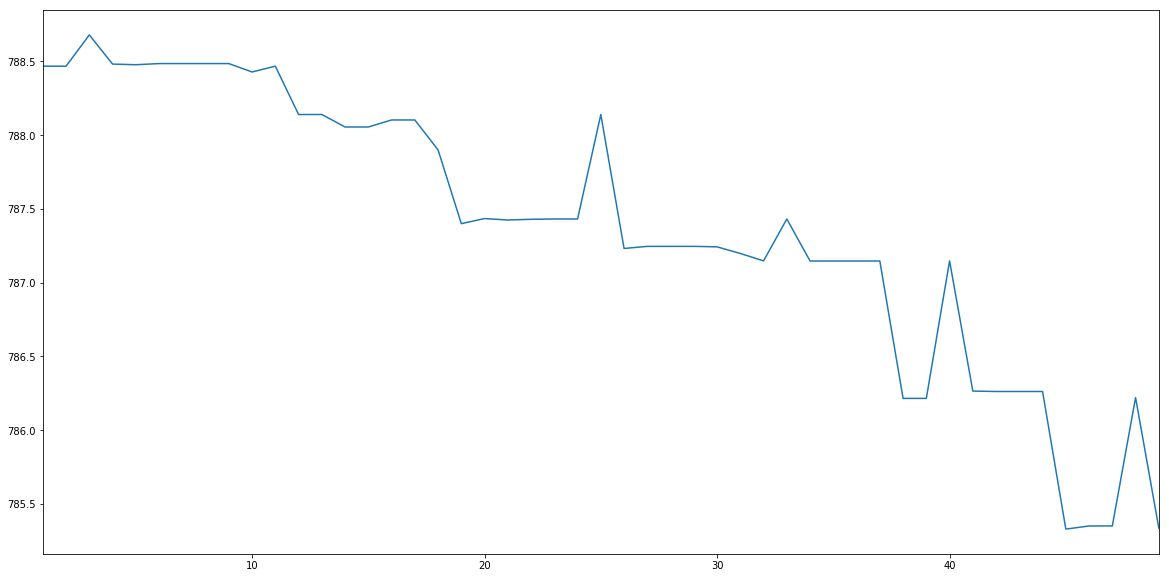

In [7]:
data['vol'][1:50].plot()

In [8]:
high_max = data['sell'].max()
low_max = data['sell'].min()

high_max, low_max

(25980.0, 22419.99999)

In [9]:
data['oscillator'] = data['sell'].apply( lambda x: (x - low_max) / (high_max - low_max))

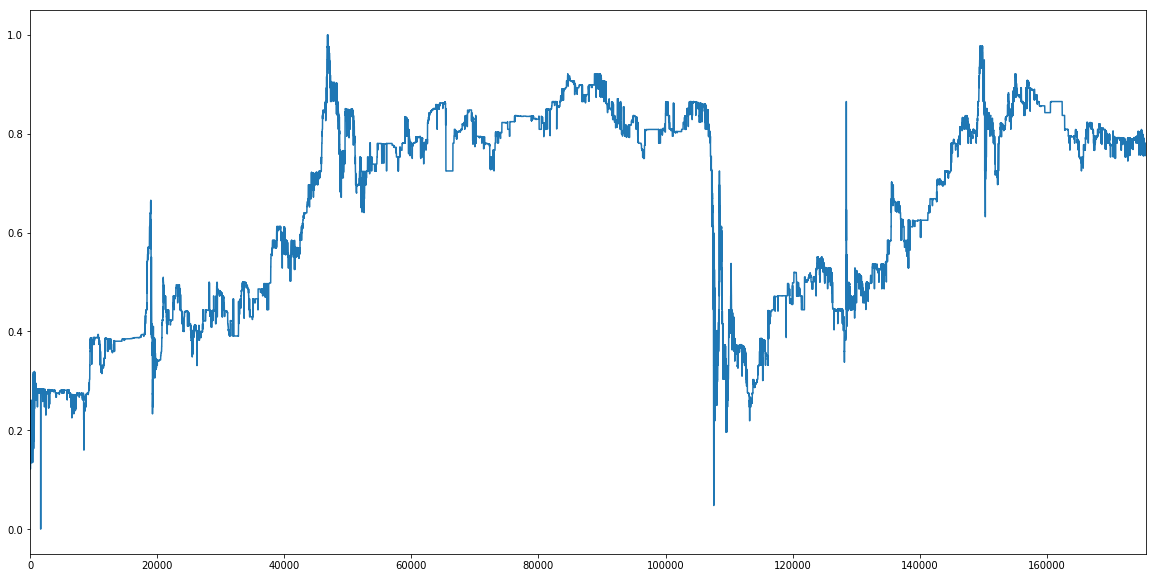

In [10]:
data['oscillator'].plot()

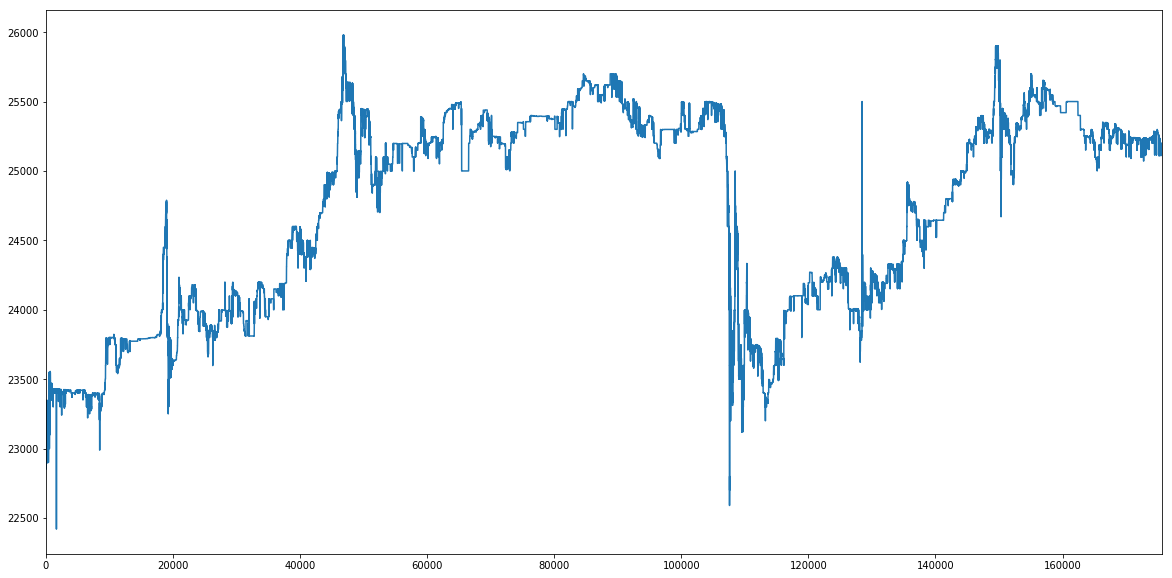

In [11]:
data['sell'].plot()

In [12]:
array = data['sell'].as_matrix();

variation_sell = []
for index in range(0, len(array)):
    if index == len(array)-1: 
        break
    variation_sell.append( array[index] - array[index+1])

array = data['buy'].as_matrix();

variation_buy = []
for index in range(0, len(array)):
    if index == len(array)-1: 
        break
    variation_buy.append( array[index] - array[index+1])

In [13]:
data['variation_sell'] = pd.DataFrame(data=variation_sell)
data['variation_buy'] = pd.DataFrame(data=variation_buy)

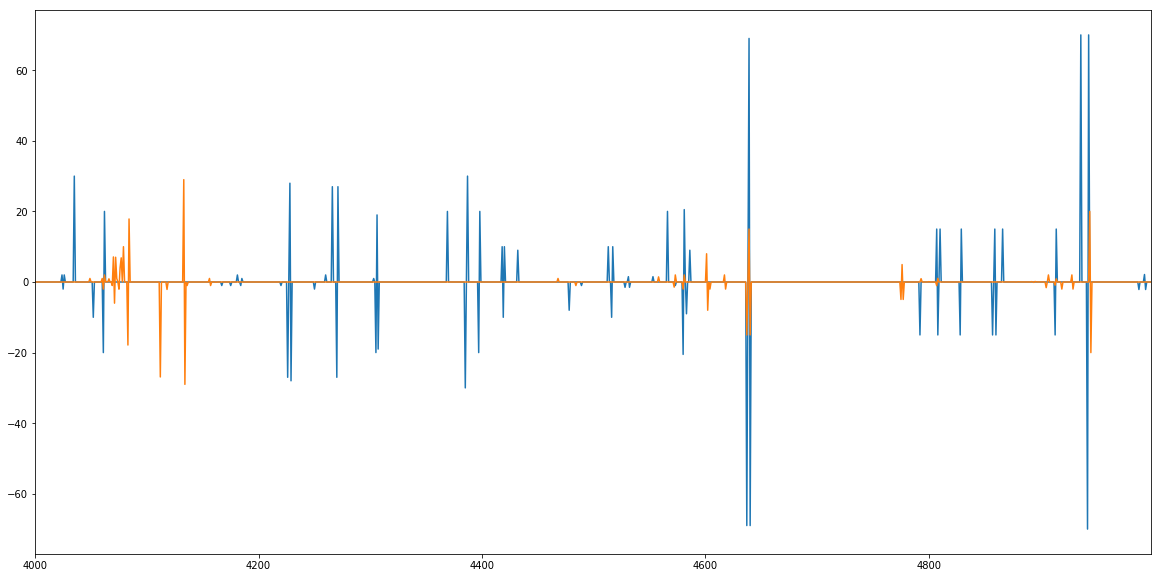

In [14]:
data['variation_buy'][4000:5000].plot()
data['variation_sell'][4000:5000].plot()

In [15]:
data['variation_sell'].describe()

count    175619.000000
mean         -0.012527
std          18.406664
min       -1000.990000
25%           0.000000
50%           0.000000
75%           0.000000
max         980.000010
Name: variation_sell, dtype: float64

In [16]:
data['variation_buy'].describe()

count    175619.000000
mean         -0.012584
std         726.161671
min     -215150.900000
25%           0.000000
50%           0.000000
75%           0.000000
max      215000.900000
Name: variation_buy, dtype: float64

In [17]:
data['sell?'] = data['variation_sell'] > 1.0
data['buy?'] = data['variation_buy'] < 1.0
data.head(10)

,sell,buy,last,vol,high,low,date,oscillator,variation_sell,variation_buy,sell?,buy?
0,23000.0,22900.0,23000.0,788.669923,23990.0,20600.0,1509541173,0.162921,0.0,0.0,False,True
1,23000.0,22900.0,23000.0,788.467873,23990.0,20600.0,1509541173,0.162921,0.0,0.0,False,True
2,23000.0,22900.0,23000.0,788.467873,23990.0,20600.0,1509541173,0.162921,0.0,0.0,False,True
3,23000.0,22900.0,23000.0,788.679923,23990.0,20600.0,1509541173,0.162921,0.0,0.0,False,True
4,23000.0,22900.0,23000.0,788.482139,23990.0,20600.0,1509541189,0.162921,0.0,0.0,False,True
5,23000.0,22900.0,22900.0,788.477748,23990.0,20600.0,1509541195,0.162921,0.0,0.0,False,True
6,23000.0,22900.0,23000.0,788.485538,23990.0,20600.0,1509541196,0.162921,0.0,0.0,False,True
7,23000.0,22900.0,23000.0,788.485538,23990.0,20600.0,1509541196,0.162921,0.0,0.0,False,True
8,23000.0,22900.0,23000.0,788.485538,23990.0,20600.0,1509541196,0.162921,0.0,0.0,False,True
9,23000.0,22900.0,23000.0,788.485538,23990.0,20600.0,1509541196,0.162921,0.0,0.0,False,True


In [18]:
initial_btc_value = 23000.0

btc_start_simulation = 0.0222

In [19]:
atual_amount = initial_btc_value * btc_start_simulation
max_traded = atual_amount
start_amount = atual_amount

In [20]:

trade_reference = initial_btc_value

has_bought = False

stop_loss_tolerance_percent = 0.00000001 / 10.0

diff_array = []

def stop_loss_tolerance(atual_amount): 
    diff = ( atual_amount - max_traded) / start_amount
    diff_array.append(diff)
    return diff < -1 * stop_loss_tolerance_percent

trade_history = []

def calculate_gain_or_miss(new_value, trade_reference, atual_amount): 
    gain_or_miss_per = (new_value - trade_reference) / trade_reference

    return (gain_or_miss_per * atual_amount) + atual_amount

for line in data.as_matrix(): 
    sell_value = line[0]
    buy_value = line[1]
    
    sell_variation = line[8]
    buy_variation = line[9]
    
    can_sell = line[10]
    can_buy = line[11]
    
    temp = calculate_gain_or_miss(sell_value if has_bought else buy_value, trade_reference, atual_amount)
    
    if stop_loss_tolerance(temp): 
        if has_bought:
            has_bought = False
            atual_amount = calculate_gain_or_miss(sell_value, trade_reference, atual_amount)
            trade_reference = sell_value
    else: 
        if can_buy:
            has_bought = True

            atual_amount = calculate_gain_or_miss(buy_value, trade_reference, atual_amount)
            trade_reference = buy_value

        if can_sell and not has_bought:
            has_bought = False
            atual_amount = calculate_gain_or_miss(sell_value, trade_reference, atual_amount)
            trade_reference = sell_value
    
    if atual_amount > max_traded: 
        max_traded = atual_amount
        
    trade_history.append(atual_amount)
    

In [21]:
trade_history = pd.DataFrame(data=trade_history)

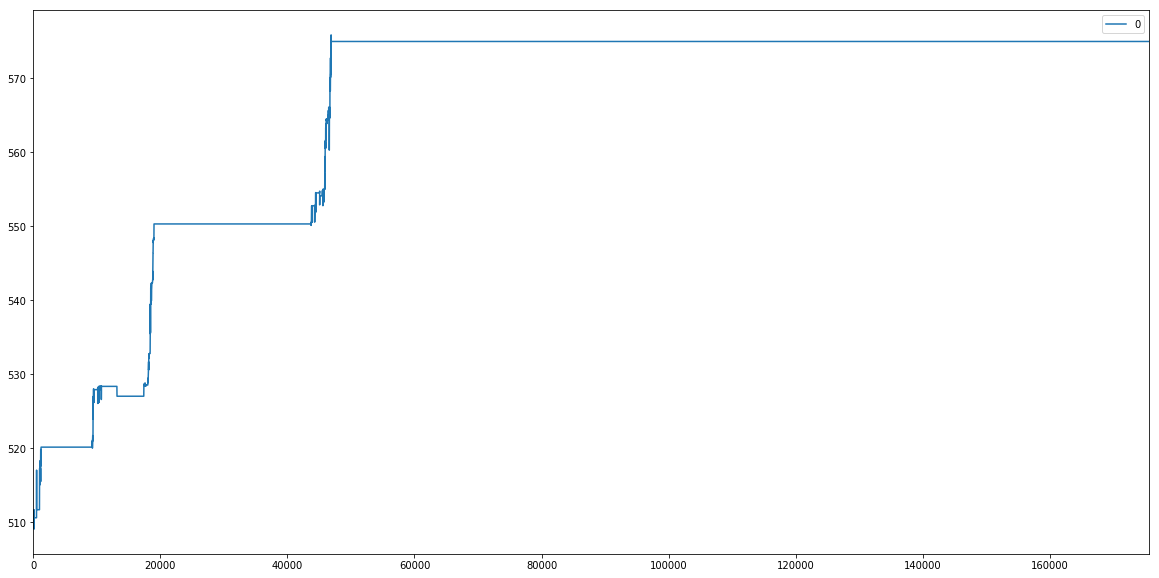

In [22]:
trade_history.plot()

In [23]:
trade_history.max()

0    575.868
dtype: float64

In [24]:
trade_history.min()

0    509.0682
dtype: float64

In [25]:
trade_history.iloc[-1]

0    574.98
Name: 175619, dtype: float64

In [26]:
trade_history.iloc[1]

0    510.6
Name: 1, dtype: float64

Ou seja, se o indivíduo investisse R 510.60 no dia 31 de Outrubro, hoje, dia 5 de novembro, o mesmo já teria R 575



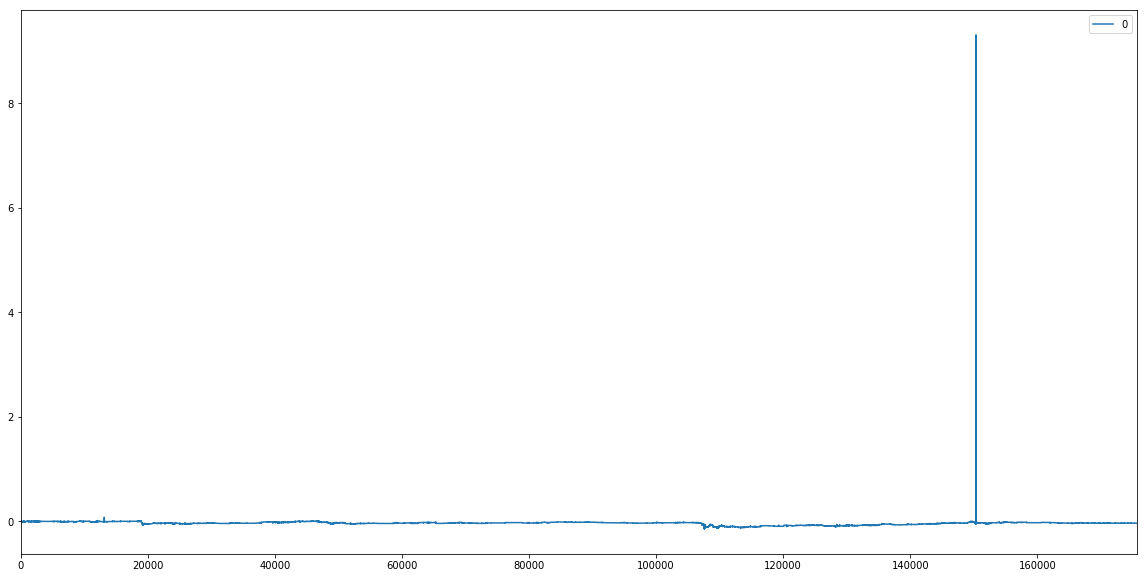

In [27]:
pd.DataFrame(data=diff_array).plot()

In [28]:
appreciation = (data['sell'].iloc[-1] - data['sell'].iloc[1]) / data['sell'].iloc[1]

In [29]:
profit_ordinal = trade_history.iloc[1] * appreciation

In [30]:
profit_ordinal + trade_history.iloc[1]

0    559.44
Name: 1, dtype: float64

In [31]:
trade_history.iloc[-1]

0    574.98
Name: 175619, dtype: float64

A penúltima conta representa o lucro obtido se o dinheiro apenas fosse aplicado e **nenhuma ação automática fosse aplicada. No final do período** a quantia inicial de R **510.60** se elevaria para R **570.10**

a última conta é o último valor registrado da venda do ativo no histórico de trades do robô. O processo automatizado conseguiu uma performace de **0.85%** a mais que o método anteiror. No final a quantia foi foi de R **574.98** 

In [32]:
((trade_history.iloc[-1] - (profit_ordinal + trade_history.iloc[1])) / (profit_ordinal + trade_history.iloc[1])) * 100

0    2.777778
dtype: float64